## Chapter 2: Orbit Determination from Observations

Exercises done in this section: 2.1, 2.2, 2.6, 2.7, 2.8


In [2]:
# Importing math and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Problem 2.1

r = [0, 0, 1]
v = [1, 0, 0]

mu = 1

h = np.cross(r, v)
I = [1, 0, 0]
K = [0, 0, 1]

n = np.cross(K, h)

# From eq. 1.5-10
e = np.cross(v, h)/mu - r
e = np.linalg.norm(e)

p = pow(np.linalg.norm(h), 2) / mu
a = p / (1 - pow(e,2))

i = 180 * np.arccos(np.dot(K, h)) / np.pi

Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi
w = np.arccos(np.dot(n, e) / np.linalg.norm(n*e))

print("Semi-Major Axis: a = %.2f DU" % a)
print("Eccentricity: e = %.2f " % e)
print("Inclination: i = %.2f degrees" % i)
print("Longitude of Ascending Node: Omega = %.2f degrees" % Omega)
print("Argument of Periapsis: w = undefined")

Semi-Major Axis: a = 1.00 DU
Eccentricity: e = 0.00 
Inclination: i = 90.00 degrees
Longitude of Ascending Node: Omega = 180.00 degrees
Argument of Periapsis: w = undefined


Semi-Major Axis: a = 0.57 DU
Semi-Lactus Rectum: p = 1/8 DU
Eccentricity: e = 0.884 
Inclination: i = 180.00 degrees
Longitude of Ascending Node: Omega = undefined
Argument of Periapsis: w = undefined 
True Anomaly at Epoch: nu0 = 171.87 degrees


Orbit is retrograte equatorial


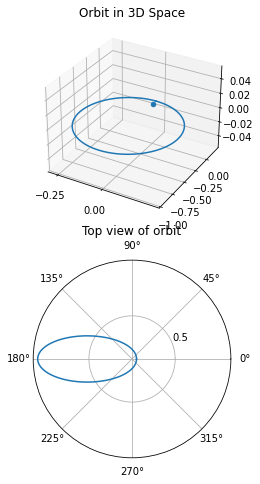

In [ ]:
# Problem 2.2

r = [-0.707, 0.707, 0]
v = [0, 1/2, 0]
mu = 1

I = [1, 0, 0]
K = [0, 0, 1]

h = np.cross(r, v)
n = np.cross(K, h)

e_vec = np.cross(v, h)/mu - r
e = np.linalg.norm(e_vec)

p = pow(np.linalg.norm(h), 2) / mu
a = p / (1 - pow(e,2))

i = 180 * np.arccos(np.dot(K, h) / np.linalg.norm(h)) / np.pi

Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi
w = np.arccos(np.dot(n, e) / np.linalg.norm(n*e))
w = np.linalg.norm(w)

nu0 = 180 * np.arccos(np.dot(e_vec, r) / (np.linalg.norm(e_vec) * np.linalg.norm(r))) / np.pi

print("Semi-Major Axis: a = %.2f DU" % a)
print("Semi-Lactus Rectum: p = 1/8 DU")
print("Eccentricity: e = %.3f " % e)
print("Inclination: i = %.2f degrees" % i)
print("Longitude of Ascending Node: Omega = undefined")
print("Argument of Periapsis: w = undefined " % w)
print("True Anomaly at Epoch: nu0 = %.2f degrees" % nu0)
print()
print()

print("Orbit is retrograte equatorial")
# Plotting the orbit in 3D space
# Since i = 180 degrees, this orbit is retrograde equatorial. This way, the z-component of the orbit is always 0
nu = np.arange(0, 2*np.pi, 0.01)
r = p/(1+e*np.cos(nu))
x = r * np.sin(nu)
y = r * np.cos(nu)
z = 0

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(211, projection='3d')

ax.plot(x, y, z)
ax.scatter(0, 0, 0)
ax.set_title("Orbit in 3D Space")
ax.set_xticks(np.arange(-1, 0.25, 0.25))
ax.set_yticks(np.arange(-1, 0.25, 0.25))
ax.set_ylim(-1, 0.25)




ax2 = fig.add_subplot(212, polar = True)
ax2.set_title("Top view of orbit")
ax2.set_yticks(np.arange(0, 1, 0.5))

# Create plots
ax2.plot(nu, r)
plt.show()



In [ ]:
# Problem 2.6

r_vec = np.array([0, 0, 1.2])
v_vec = np.array([0.4, 0, -0.3])
mu = 1

I = np.array([1, 0, 0])
J = np.array([0, 1, 0])
K = np.array([0, 0, 1])

r = np.linalg.norm(r_vec)
v = np.linalg.norm(v_vec)

h = np.cross(r_vec, v_vec)
p = pow(np.linalg.norm(h), 2) / mu

e_vec = 1/mu * ((pow(v, 2) - mu/r)*r_vec - (np.dot(r_vec, v_vec))*v_vec)
e = np.linalg.norm(e_vec)

i = 180 * np.arccos(np.dot(K, h) / np.linalg.norm(h)) / np.pi

n = np.cross(K, h)
Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi

eK = np.dot(K, e_vec)
w = 180 * np.arccos(np.dot(n, e_vec) / (np.linalg.norm(n)*e)) / np.pi

u0  = 180 * np.arccos(np.dot(n,r_vec)/(np.linalg.norm(n)*r)) / np.pi

nu0 = u0 - w
l0 = Omega + w + nu0 

print("p = %.2f DU" % p)
print("e = %.4f" % e)
print("i = %i degrees" % i)
print("Omega = %i degrees" % Omega)
print("w = %.2f degrees" % w)
print("nu0 = %.2f degrees" % nu0)
print("l0 = %.2f degrees" % l0)
print("u0 = %.2f degrees" % u0)


p = 0.23 DU
e = 0.8207
i = 90 degrees
Omega = 180 degrees
w = 100.11 degrees
nu0 = -10.11 degrees
l0 = 270.00 degrees
u0 = 90.00 degrees


In [ ]:
# Problem 2.7

r0_vec = np.array([-1, -1, -1])
v0_vec = np.array([1/3, -1/3, 1/3])
mu = 1

I = np.array([1, 0, 0])
J = np.array([0, 1, 0])
K = np.array([0, 0, 1])

r0 = np.linalg.norm(r0_vec)
v0 = np.linalg.norm(v0_vec)

h = np.cross(r0_vec, v0_vec)
p = pow(np.linalg.norm(h), 2) / mu

e_vec = 1/mu * ((pow(v0, 2) - mu/r0)*r0_vec - (np.dot(r0_vec, v0_vec))*v0_vec)
e = np.linalg.norm(e_vec)

i = 180 * np.arccos(np.dot(K, h) / np.linalg.norm(h)) / np.pi

n = np.cross(K, h)
Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi

eK = np.dot(K, e_vec)
w = 180 * np.arccos(np.dot(n, e_vec) / (np.linalg.norm(n)*e)) / np.pi

u0  = 180 * np.arccos(np.dot(n,r0_vec)/(np.linalg.norm(n)*r0)) / np.pi

nu0 = u0 - w
l0 = Omega + w + nu0 


print("p = %.4f DU" % p)
print("e = %.4f" % e)
print("i = %i degrees" % i)
print("Omega = %i degrees" % Omega)
print("w = %.2f degrees" % w)
print("nu0 = %.2f degrees" % nu0)
print("l0 = %.2f degrees" % l0)
print("u0 = %.2f degrees" % u0)


p = 0.8889 DU
e = 0.5195
i = 45 degrees
Omega = 90 degrees
w = 104.82 degrees
nu0 = -50.09 degrees
l0 = 144.74 degrees
u0 = 54.74 degrees


In [17]:
# Problem 2.8

p = 0.23
e = 0.82
i = 90 * np.pi / 180
u0 = 90
Omega = 180 * np.pi / 180
w = 260 * np.pi / 180
v0 = 190
l0 = 280

mu = 1

# Part (a) - r and v vectors in perifocal coordinate system

r = p/(1+e*np.cos(v0*np.pi/180))
r_vec = np.array([[r*np.cos(v0*np.pi/180)], [r*np.sin(v0*np.pi/180)], [0]])
v_vec = sqrt(mu/p) * np.array([[-np.sin(v0*np.pi/180)], [(e+np.cos(v0*np.pi/180))], [0]])

print("Part (a): in perifocal coordinate system (P, Q, and W unit vectors)")
print("r = ", r_vec, "P, Q, W")
print("v = ", v_vec, "P, Q, W")

# Part (b) - coordinate transformation to geocentric equatorial system
R11 = np.cos(Omega)*np.cos(w) - np.sin(Omega)*np.sin(w)*np.cos(i)
R12 = -np.cos(Omega)*np.sin(w) - np.sin(Omega)*np.cos(w)*np.cos(i)
R13 = np.sin(Omega)*np.sin(i)
R21 = np.sin(Omega)*np.cos(w) + np.cos(Omega)*np.sin(w)*np.cos(i)
R22 = -np.sin(Omega)*np.sin(w) + np.cos(Omega)*np.cos(w)*np.cos(i)
R23 = -np.cos(Omega)*np.sin(i)
R31 = np.sin(w)*np.sin(i)
R32 = np.cos(w)*np.sin(i)
R33 = np.cos(i)

R = np.matrix([[R11, R12, R13], [R21, R22, R23], [R31, R32, R33]])

r_geo = R * r_vec
v_geo = R * v_vec

print()
print("Part (b): in geocentric equatorial system (I, J, K)")
print("r = ", r_geo, "I, J, K")
print("v = ", v_geo, "I, J, K")


Part (a): in perifocal coordinate system (P, Q, and W unit vectors)
r =  [[-1.17691239]
 [-0.20752141]
 [ 0.        ]] P, Q, W
v =  [[ 0.36208148]
 [-0.34364792]
 [ 0.        ]] P, Q, W

Part (b): in geocentric equatorial system (I, J, K)
r =  [[ 1.66533454e-16]
 [-7.31768196e-17]
 [ 1.19506816e+00]] I, J, K
v =  [[ 4.01301926e-01]
 [-3.09650129e-17]
 [-2.96906814e-01]] I, J, K
